# 03 - Kaggle - bike share system - data visualization


For problem formulation refer to **"01 - Kaggle - bike share system - problem formulation.ipynb"**.
In section **"02 - Kaggle - bike share system - Data preprocessing.ipynb"** we transformed the raw data and extracted time, date, and dummy matrices. The results are stored in two formats:
 * In `train_prep_orig.csv` and `test_prep_orig.csv` the categorical data are in the original form.
 * In `train_prep_dum.csv` and `test_prep_dum.csv` the categorical data are converted to dummy matrices. 


In this section we visulaize and analyze the data. We use the data in `train_prep_orig.csv`, which includes:



<center> temp|  atemp | humidity | windspeed | year | season | month | weekday | hour | workingday | holiday | weather | casual | registered | count
 </center>

- **temp**: temperature in Celsius. 

- **atemp**: "feels like" temperature in Celsius.

- **humidity**: relative humidity

- **windspeed**: wind speed

- **year**: 2011 or 2012

- **season**: Kaggle's [website](https://www.kaggle.com/c/bike-sharing-demand/data) says "`1 = spring, 2 = summer, 3 = fall, 4 = winter`", but the season indecies in the dataset correspond to 
    - 1 = Winter (January-March)
    - 2 = Spring (April-June)
    - 3 = Summer (July-September)
    - 4 = Fall (October-December)
    
- **month**: The month as January=1, December=12  

- **weekday**: The day of the week with Monday=0, Sunday=6

- **hour**: The hours of the datetime 0 - 23

- **workingday**: whether the day is neither a weekend nor holiday
     - 0 = day is weekend or holiday
     - 1 = otherwise 

- **holiday**: whether the day is considered a holiday 
    - 0 = non-holiday
    - 1 = holiday

- **weather**: encoded to make explicit various extreme weather events
    - 1 = Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
    - 4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- **casual**: number of non-registered user rentals initiated

- **registered**: number of registered user rentals initiated

- **tot**: number of total rentals (casual + registered)



### Basic settings and importing the libraries

In [317]:
# Resets the namespace by removing all names defined by the user without asking for confirmation
%reset -f


# Panas is used for DataFrame
import pandas as pd

# NumPy is used for manipulating arrays
import numpy as np

# MatPlotLib is used for plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# the output of plotting commands is displayed inline directly below the code cell that produced it.
%matplotlib inline

# Seaborn is used for statistical plotting
import seaborn as sns

# Used for display dataframes as html tables
from IPython.display import display

### Importing the train data from `train_prep_orig.csv`

In [318]:
#Load train data
data_train = pd.read_csv('data/train_prep_orig.csv')

print "The shape of the train dataset:", data_train.shape
display(data_train.head())
display(data_train.tail())
display(data_train.describe())
data_train.dtypes

The shape of the train dataset: (10886, 15)


temp   atemp  humidity  windspeed  year  season  month  weekday  hour  \
0  9.84  14.395        81          0  2011       1      1        5     0   
1  9.02  13.635        80          0  2011       1      1        5     1   
2  9.02  13.635        80          0  2011       1      1        5     2   
3  9.84  14.395        75          0  2011       1      1        5     3   
4  9.84  14.395        75          0  2011       1      1        5     4   

   workingday  holiday  weather  casual  registered  tot  
0           0        0        1       3          13   16  
1           0        0        1       8          32   40  
2           0        0        1       5          27   32  
3           0        0        1       3          10   13  
4           0        0        1       0           1    1

temp   atemp  humidity  windspeed  year  season  month  weekday  hour  \
10881  15.58  19.695        50    26.0027  2012       4     12        2    19   
10882  14.76  17.425        57    15.0013  2012       4     12        2    20   
10883  13.94  15.910        61    15.0013  2012       4     12        2    21   
10884  13.94  17.425        61     6.0032  2012       4     12        2    22   
10885  13.12  16.665        66     8.9981  2012       4     12        2    23   

       workingday  holiday  weather  casual  registered  tot  
10881           1        0        1       7         329  336  
10882           1        0        1      10         231  241  
10883           1        0        1       4         164  168  
10884           1        0        1      12         117  129  
10885           1        0        1       4          84   88

temp         atemp      humidity     windspeed          year  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395   2011.501929   
std        7.79159      8.474601     19.245033      8.164537      0.500019   
min        0.82000      0.760000      0.000000      0.000000   2011.000000   
25%       13.94000     16.665000     47.000000      7.001500   2011.000000   
50%       20.50000     24.240000     62.000000     12.998000   2012.000000   
75%       26.24000     31.060000     77.000000     16.997900   2012.000000   
max       41.00000     45.455000    100.000000     56.996900   2012.000000   

             season         month       weekday          hour    workingday  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean       2.506614      6.521495      3.013963     11.541613      0.680875   
std        1.116174      3.444373      2.004585      6.915838      0.466159   
min        1.000000      1.000000      0.000000      0.000000      0.000000   
25%        2.000000      4.000000      1.000000      6.000000      0.000000   
50%        3.000000      7.000000      3.000000     12.000000      1.000000   
75%        4.000000     10.000000      5.000000     18.000000      1.000000   
max        4.000000     12.000000      6.000000     23.000000      1.000000   

            holiday       weather        casual    registered           tot  
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000  
mean       0.028569      1.418427     36.021955    155.552177    191.574132  
std        0.166599      0.633839     49.960477    151.039033    181.144454  
min        0.000000      1.000000      0.000000      0.000000      1.000000  
25%        0.000000      1.000000      4.000000     36.000000     42.000000  
50%        0.000000      1.000000     17.000000    118.000000    145.000000  
75%        0.000000      2.000000     49.000000    222.000000    284.000000  
max        1.000000      4.000000    367.000000    886.000000    977.000000

temp          float64
atemp         float64
humidity      float64
windspeed     float64
year            int64
season          int64
month           int64
weekday         int64
hour            int64
workingday      int64
holiday         int64
weather         int64
casual          int64
registered      int64
tot             int64
dtype: object

## features and dictionaries

In [319]:
cat_var = ['year','season', 'month', 'weekday', 'hour', 'workingday', 'holiday', 'weather']
num_var = ['temp', 'atemp', 'humidity', 'windspeed']
target_var = ['casual', 'registered', 'tot']

weekday_dic = {0:'Monday',
              1:'Tuesday',
              2:'Wednesday',
              3:'Thursday',
              4:'Friday',
              5:'Saturday',
              6:'Sunday'}

## Total customers during 2011 and 2012

In [320]:
sum_customers = data_train.groupby(["year","weekday"]).sum()[target_var]
display(sum_customers)

casual  registered     tot
year weekday                            
2011 0         21044       94772  115816
     1         14536       97312  111848
     2         11586       86507   98093
     3         13419       94999  108418
     4         19147      100071  119218
     5         38371       78727  117098
     6         37714       73774  111488
2012 0         25244      154236  179480
     1         20829      159308  180137
     2         23345      170788  194133
     3         23864      174119  197983
     4         28255      155031  183286
     5         62411      132009  194420
     6         52370      121688  174058

## Average customer per day  for 2011 and 2012 

### 2011 and 2012 together

casual  registered         tot
weekday                                   
0        29.843972  160.546744  190.390716
1        22.979207  166.744639  189.723847
2        22.521599  165.889749  188.411348
3        24.007083  173.289118  197.296201
4        31.001962  166.842381  197.844343
5        63.625000  133.040404  196.665404
6        57.051298  123.788474  180.839772

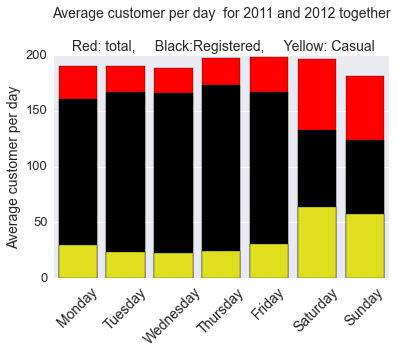

In [321]:
weekly_avg = data_train.groupby("weekday").mean()[target_var]

display(weekly_avg)

days=np.arange(7)
sns.barplot(days,weekly_avg['tot'],color="Red",saturation=1)
sns.barplot(days, weekly_avg.registered, color="Black")
sns.barplot(days, weekly_avg.casual,color="Yellow")
plt.xticks(days, weekday_dic.values(), size = 14, rotation = 45)
plt.yticks(size = 13)
plt.ylabel("Average customer per day", size = 14, rotation = 90)
#plt.legend(['total','registered','casual'],loc='upper right', bbox_to_anchor=(1.2, 0.5))
plt.title(
    "Average customer per day  for 2011 and 2012 together\n\n Red: total,     Black:Registered,     Yellow: Casual", 
    size = 14)
plt.show()

### 2011

casual  registered         tot
weekday                                   
0        27.616798  124.372703  151.989501
1        18.804657  125.888745  144.693402
2        15.244737  113.825000  129.069737
3        17.610236  124.670604  142.280840
4        24.391083  127.478981  151.870064
5        47.023284   96.479167  143.502451
6        49.363874   96.562827  145.926702

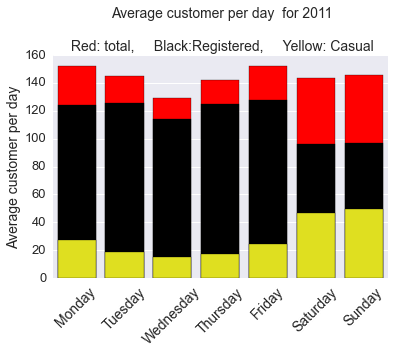

In [322]:
weekly_avg = data_train.groupby(["year","weekday"]).mean().xs(2011, level = 'year')[target_var]

display(weekly_avg)

days=np.arange(7)
sns.barplot(days,weekly_avg['tot'],color="Red",saturation=1)
sns.barplot(days, weekly_avg.registered, color="Black")
sns.barplot(days, weekly_avg.casual,color="Yellow")
plt.xticks(days, weekday_dic.values(), size = 14, rotation = 45)
plt.yticks(size = 13)
plt.ylabel("Average customer per day", size = 14, rotation = 90)
#plt.legend(['total','registered','casual'],loc='upper right', bbox_to_anchor=(1.2, 0.5))
plt.title("Average customer per day  for 2011\n\n Red: total,     Black:Registered,     Yellow: Casual", size = 14)
plt.show()

### 2012

casual  registered         tot
weekday                                   
0        31.994930  195.482890  227.477820
1        27.191906  207.973890  235.165796
2        29.513274  215.914033  245.427307
3        30.169406  220.125158  250.294564
4        37.977151  208.375000  246.352151
5        81.264323  171.886719  253.151042
6        64.257669  149.310429  213.568098

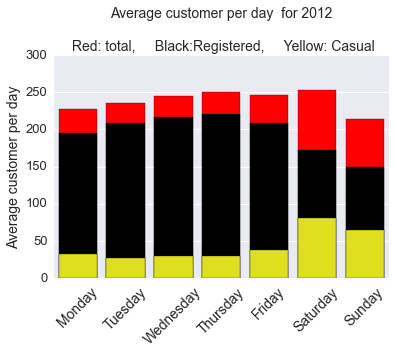

In [323]:
weekly_avg = data_train.groupby(["year","weekday"]).mean().xs(2012, level = 'year')[target_var]

display(weekly_avg)

days=np.arange(7)
sns.barplot(days,weekly_avg['tot'],color="Red",saturation=1)
sns.barplot(days, weekly_avg.registered, color="Black")
sns.barplot(days, weekly_avg.casual,color="Yellow")
plt.xticks(days, weekday_dic.values(), size = 14, rotation = 45)
plt.yticks(size = 13)
plt.ylabel("Average customer per day", size = 14, rotation = 90)
#plt.legend(['total','registered','casual'],loc='upper right', bbox_to_anchor=(1.2, 0.5))
plt.title("Average customer per day  for 2012\n\n Red: total,     Black:Registered,     Yellow: Casual", size = 14)
plt.show()

### 2011 and 2012 on the same curve

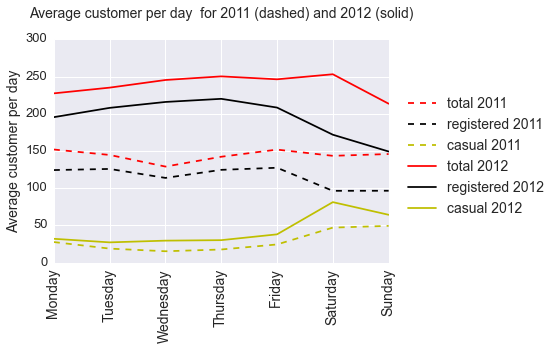

In [324]:
days=np.arange(7)

weekly_avg = data_train.groupby(["year","weekday"]).mean().xs(2011, level = 'year')[target_var]
plt.plot(days,weekly_avg['tot'], "r--")
plt.plot(days, weekly_avg.registered, "k--")
plt.plot(days, weekly_avg.casual,"y--")

weekly_avg = data_train.groupby(["year","weekday"]).mean().xs(2012, level = 'year')[target_var]
plt.plot(days,weekly_avg['tot'], "r-")
plt.plot(days, weekly_avg.registered, "k-")
plt.plot(days, weekly_avg.casual,"y-")
plt.xticks(days, weekday_dic.values(), size = 14, rotation = 90)
plt.yticks(size = 13)
plt.ylabel("Average customer per day", size = 14, rotation = 90)
plt.legend(['total 2011','registered 2011','casual 2011', 'total 2012','registered 2012','casual 2012'],
           loc='upper right', bbox_to_anchor=(1.5, 0.8), fontsize = 14)
plt.title("Average customer per day  for 2011 (dashed) and 2012 (solid)\n", size = 14)
plt.show()



The above plot shows the average number of customers per day for 2011 and 2012. Clearly, the business have been successful and have had a growth. In 2011, the minimum average usage has been for Wednesday while in 2012 it has been for Sunday.

Next, we would like to see the distributoin of average customer usage for each day over the two year period. For a semi tutorial for the code see **Tutorial - Multi Indexig and Groupby in Pandas.ipynb**

## Average number of customers for each day during the years

In [325]:
groupby_year_month_weekday = data_train.groupby(['year','month','weekday']).mean()[target_var]
display(groupby_year_month_weekday.head(10))

print "Example: the distribution average customrs on Mondays"
groupby_year_month_weekday.xs(0, level = 'weekday', axis = 0)

casual  registered        tot
year month weekday                                 
2011 1     0        3.971429   48.457143  52.428571
           1        2.807018   58.736842  61.543860
           2        2.720588   62.161765  64.882353
           3        2.680851   61.404255  64.085106
           4        4.391304   59.326087  63.717391
           5        8.625000   35.708333  44.333333
           6        6.140845   33.676056  39.816901
     2     0        6.833333   68.687500  75.520833
           1        3.585714   63.628571  67.214286
           2        4.900000   70.042857  74.942857

Example: the distribution average customrs on Mondays


casual  registered         tot
year month                                   
2011 1       3.971429   48.457143   52.428571
     2       6.833333   68.687500   75.520833
     3      13.108696   72.065217   85.173913
     4      31.802817  107.521127  139.323944
     5      31.722222  144.958333  176.680556
     6      32.000000  167.333333  199.333333
     7      64.291667  138.305556  202.597222
     8      32.638889  146.944444  179.583333
     9      36.859155  140.647887  177.507042
     10     35.513889  148.611111  184.125000
     11     20.166667  157.354167  177.520833
     12      8.833333  137.333333  146.166667
2012 1       7.985915   85.323944   93.309859
     2       6.382979  146.936170  153.319149
     3      28.097222  177.236111  205.333333
     4      46.633803  205.352113  251.985915
     5      28.125000  161.791667  189.916667
     6      38.069444  222.500000  260.569444
     7      41.527778  231.055556  272.583333
     8      50.833333  238.666667  289.500000
     9      57.013889  226.708333  283.722222
     10     33.291667  218.527778  251.819444
     11     26.722222  209.763889  236.486111
     12     15.222222  206.847222  222.069444

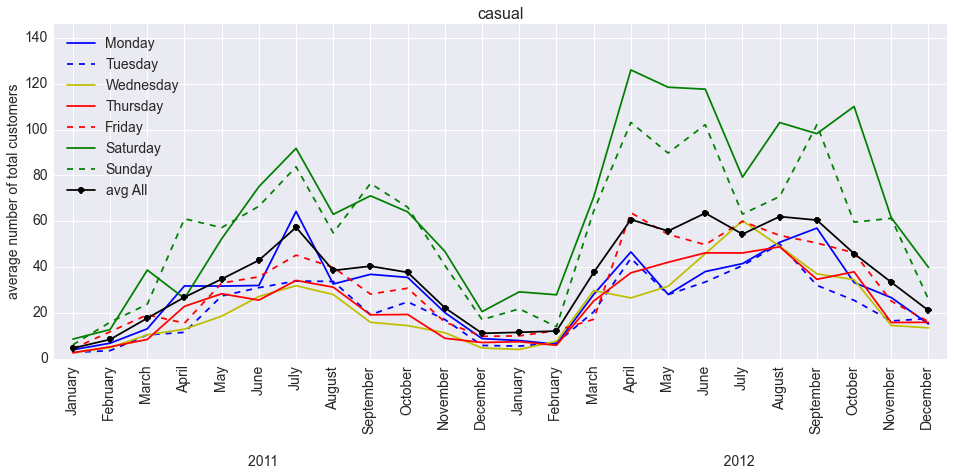

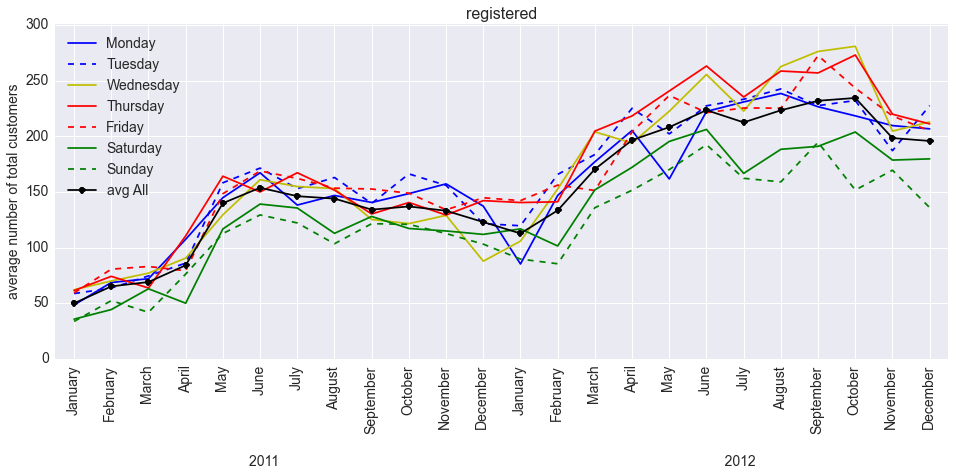

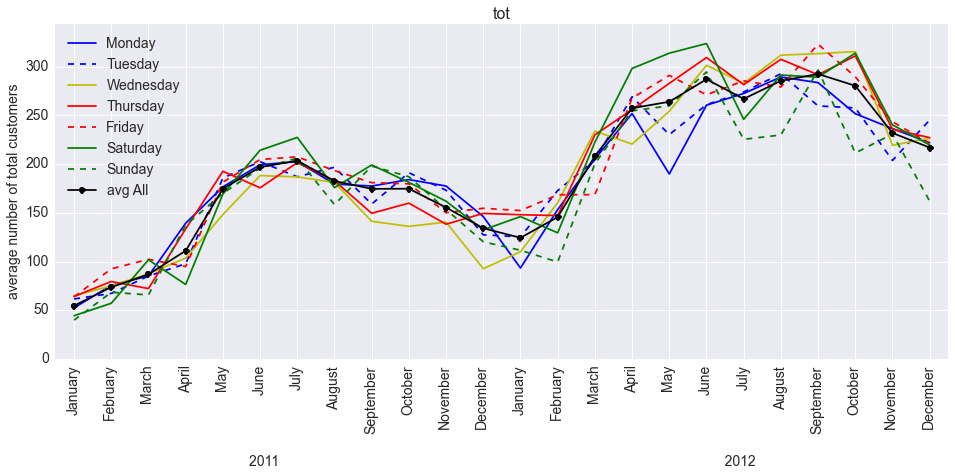

In [326]:

months = ['January','February','March','April','May','June','July',
          'August','September','October','November','December']
weekday_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

colors = ["b-","b--","y","r-","r--","g-","g--"]

max_y = 0

for target in target_var:
    plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

    
    # plotting for each weekday
    for i in range(7):
        tot_mean = groupby_year_month_weekday.xs(i, level = 'weekday', axis = 0)[target]
        plt.plot(tot_mean,colors[i])
        max_y = max(max_y,max(tot_mean.tolist()))
    
    # adding the monthly average counting all weekdays
    plt.plot(data_train.groupby(['year','month']).mean()[target],"ko-")
    
    plt.title(target,fontsize=16)
    plt.legend(weekday_names + ['avg All'], loc = 'best', fontsize = 14)    
    plt.xticks(range(24), months*2,rotation = 90, fontsize = 14)  
    plt.yticks(fontsize = 14)
    plt.xlabel("\n2011".ljust(120)+"2012", fontsize = 14)
    plt.ylabel("average number of total customers", fontsize = 14)
    plt.axis((-.5,23.5,0,max_y + 20))    
    plt.show()  

A few issues are clear from the graphs. 
* Casual customers use the system on weekends more while registerd customers use the system on workdays more. For the total number of customers, these two effectes are combined and we see fluctuations between highest and lowest at different months over the weekends.
* For total customers, depending on the month, the weekday with maximum of average number of total customers can vary. The data shows a pattern of the shape $f(x) = a_0 + a_1 x + a_3 \cos\left(2 \pi \frac{x}{12}+\theta_0\right)$. So, we may be able to add a few features to the data than includes this seasonality. 

## Analyzing data in shorter time frames

Let's split the hours time into 6 chinks of 4 hours periods:
* 1: [2:00 am, 3:00 am, 4:00 am, 5:00 am]  --> [2,3,4,5]
* 2: [6:00 am, 7:00 am, 8:00 am, 9:00 am]  --> [6,7,8,9]
* 3: [10:00 am, 11:00 am, 12:00 pm, 1:00 pm]  --> [10,11,12,13]
* 4: [2:00 pm, 3:00 pm, 4:00 pm, 5:00 pm]  --> [14,15,16,17]
* 5: [6:00 pm, 7:00 pm, 8:00 pm, 9:00 pm]  --> [18,19,20,21]
* 6: [10:00 pm, 11:00 pm, 12:00 am, 1:00 pm]  --> [22,23,1,4]

In [327]:
hours = np.array(data_train.hour)

data_train['periods']=np.where( (2 <= hours) &  (hours <= 5), 1,
                        np.where( (6 <= hours) &  (hours <= 9), 2,
                                 np.where( (10 <= hours) &  (hours <= 13), 3,
                                          np.where( (14 <= hours) &  (hours <= 17), 4,
                                                  np.where( (18 <= hours) &  (hours <= 23), 5, 6)
                                                  )
                                         )
                                )
                        )
data_train.head(20)

temp   atemp  humidity  windspeed  year  season  month  weekday  hour  \
0    9.84  14.395        81     0.0000  2011       1      1        5     0   
1    9.02  13.635        80     0.0000  2011       1      1        5     1   
2    9.02  13.635        80     0.0000  2011       1      1        5     2   
3    9.84  14.395        75     0.0000  2011       1      1        5     3   
4    9.84  14.395        75     0.0000  2011       1      1        5     4   
5    9.84  12.880        75     6.0032  2011       1      1        5     5   
6    9.02  13.635        80     0.0000  2011       1      1        5     6   
7    8.20  12.880        86     0.0000  2011       1      1        5     7   
8    9.84  14.395        75     0.0000  2011       1      1        5     8   
9   13.12  17.425        76     0.0000  2011       1      1        5     9   
10  15.58  19.695        76    16.9979  2011       1      1        5    10   
11  14.76  16.665        81    19.0012  2011       1      1        5    11   
12  17.22  21.210        77    19.0012  2011       1      1        5    12   
13  18.86  22.725        72    19.9995  2011       1      1        5    13   
14  18.86  22.725        72    19.0012  2011       1      1        5    14   
15  18.04  21.970        77    19.9995  2011       1      1        5    15   
16  17.22  21.210        82    19.9995  2011       1      1        5    16   
17  18.04  21.970        82    19.0012  2011       1      1        5    17   
18  17.22  21.210        88    16.9979  2011       1      1        5    18   
19  17.22  21.210        88    16.9979  2011       1      1        5    19   

    workingday  holiday  weather  casual  registered  tot  periods  
0            0        0        1       3          13   16        6  
1            0        0        1       8          32   40        6  
2            0        0        1       5          27   32        1  
3            0        0        1       3          10   13        1  
4            0        0        1       0           1    1        1  
5            0        0        2       0           1    1        1  
6            0        0        1       2           0    2        2  
7            0        0        1       1           2    3        2  
8            0        0        1       1           7    8        2  
9            0        0        1       8           6   14        2  
10           0        0        1      12          24   36        3  
11           0        0        1      26          30   56        3  
12           0        0        1      29          55   84        3  
13           0        0        2      47          47   94        3  
14           0        0        2      35          71  106        4  
15           0        0        2      40          70  110        4  
16           0        0        2      41          52   93        4  
17           0        0        2      15          52   67        4  
18           0        0        3       9          26   35        5  
19           0        0        3       6          31   37        5

### Grouping by ['`year`','`month`','`weekday`','`period`']

Now, we would like to learn how does it changes acros different months, weekdays and day periods. We only work with `mean` here .

In [328]:
groupby_year_month_weekday_periods = data_train.groupby(['year','month','weekday','periods']).mean()[target_var]
display(groupby_year_month_weekday_periods.head(10))

casual  registered         tot
year month weekday periods                                  
2011 1     0       1        0.200000    2.600000    2.800000
                   2        2.666667   66.000000   68.666667
                   3        7.666667   48.833333   56.500000
                   4        8.166667   80.000000   88.166667
                   5        2.722222   54.833333   57.555556
                   6        0.833333    6.833333    7.666667
           1       1        0.000000    3.200000    3.200000
                   2        1.750000  108.500000  110.250000
                   3        5.700000   44.000000   49.700000
                   4        6.000000   76.833333   82.833333

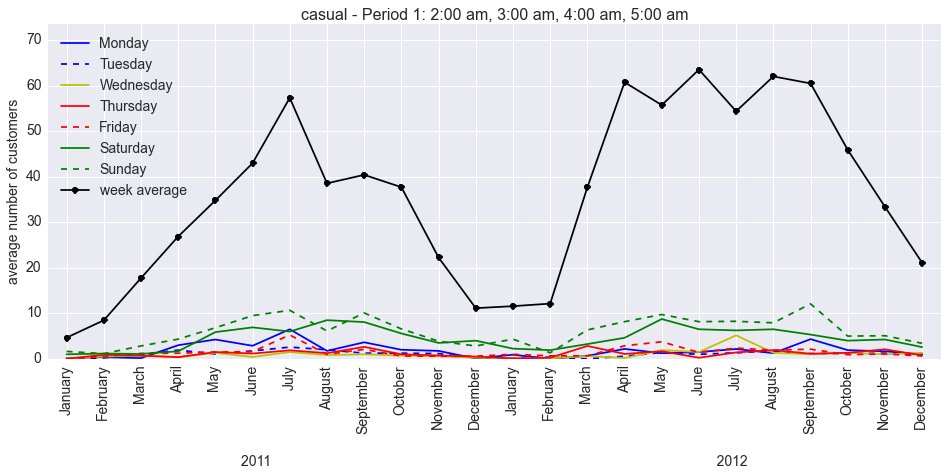

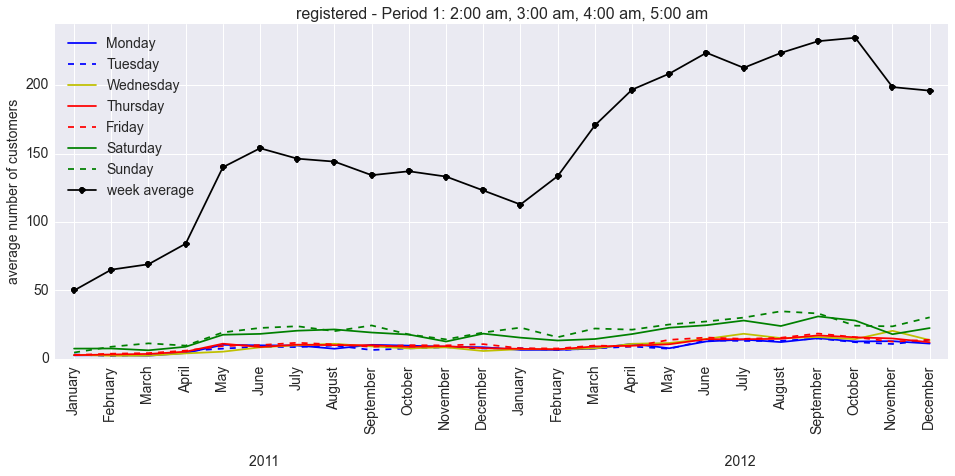

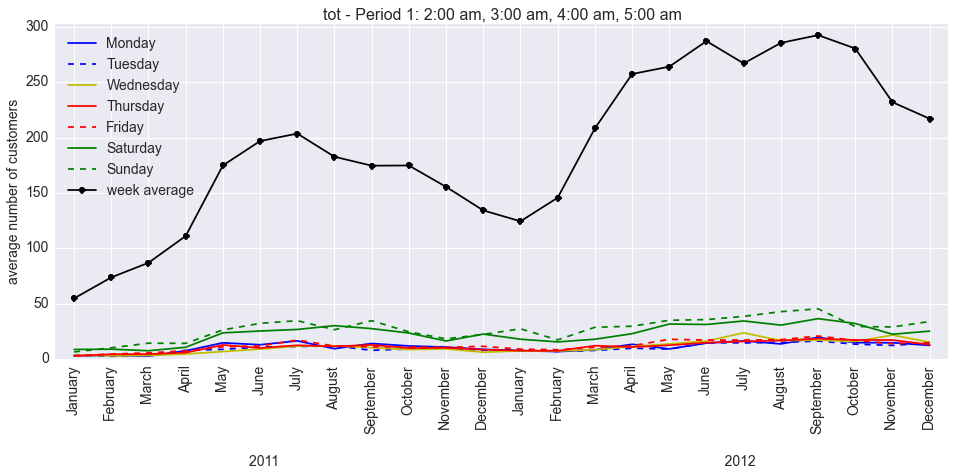

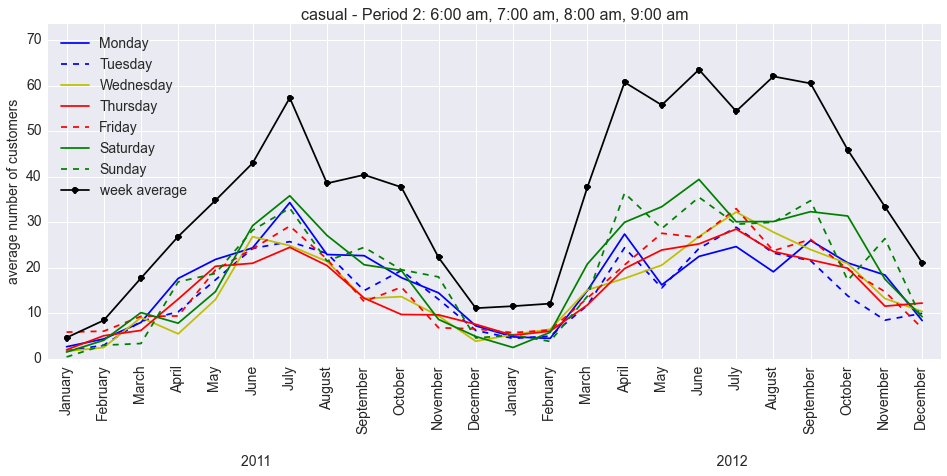

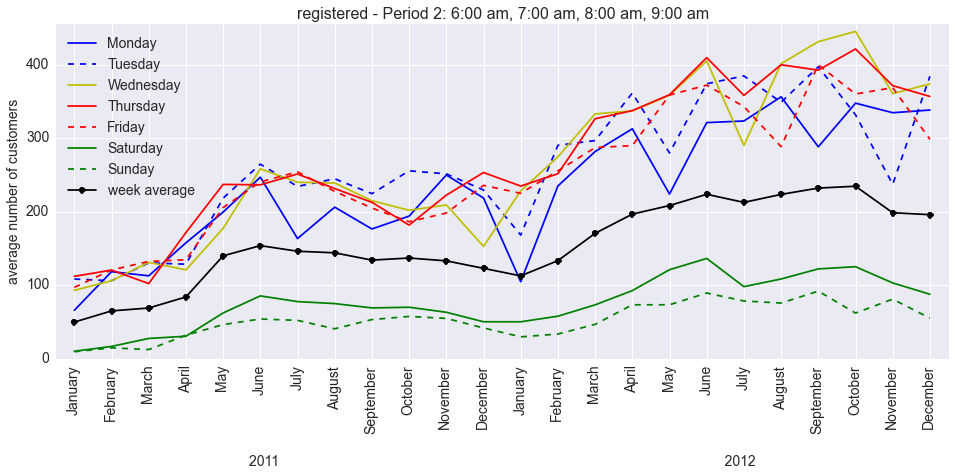

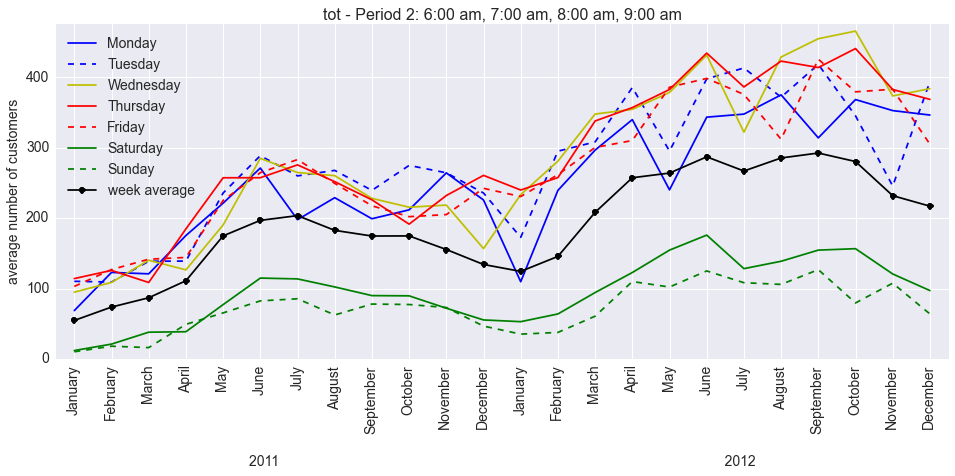

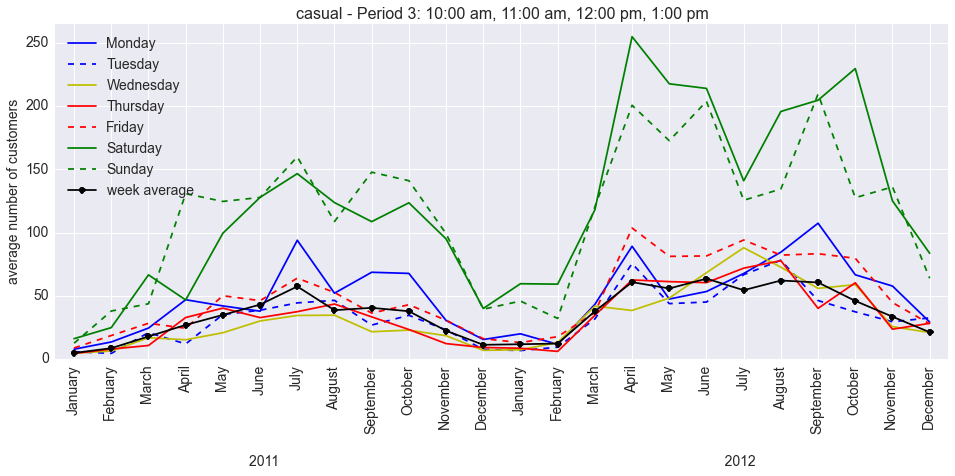

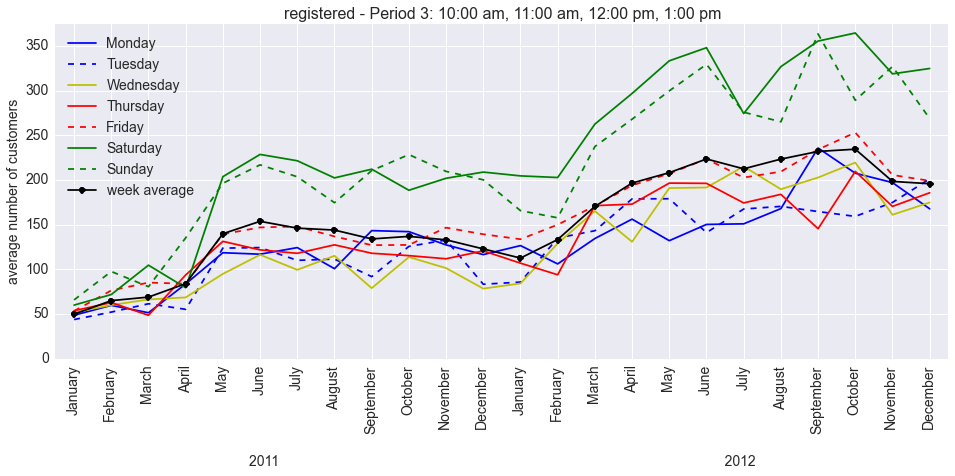

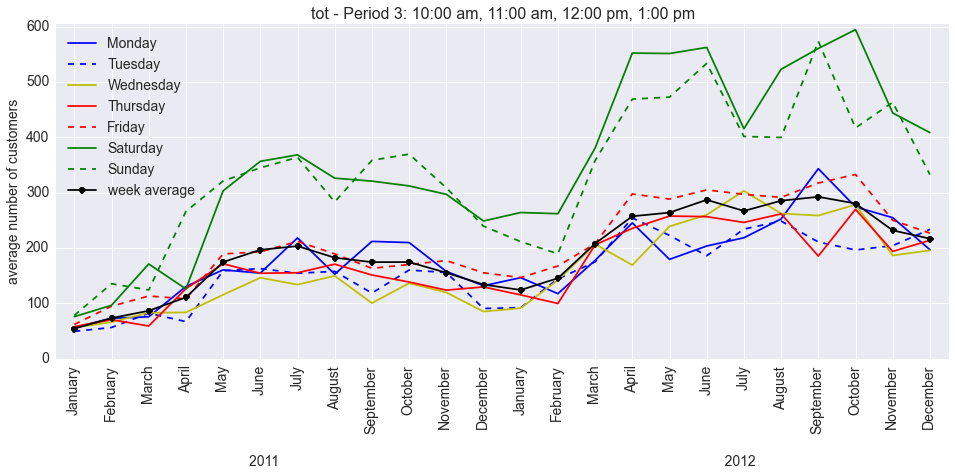

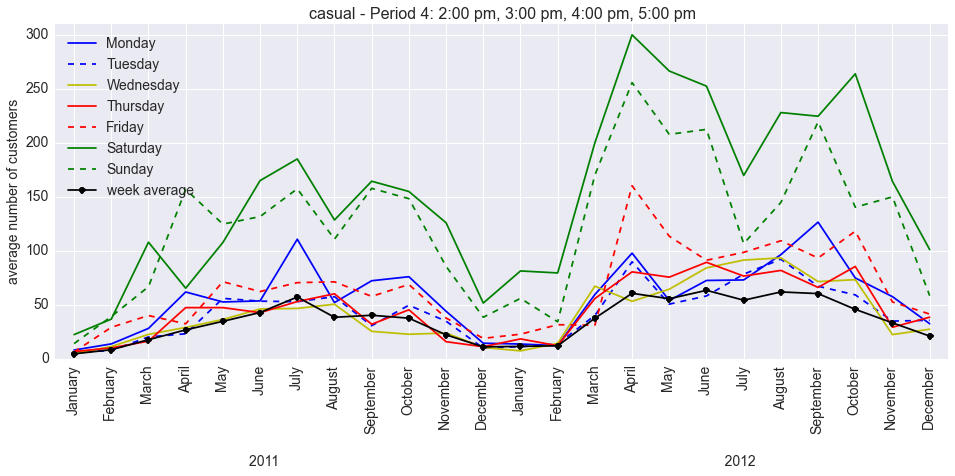

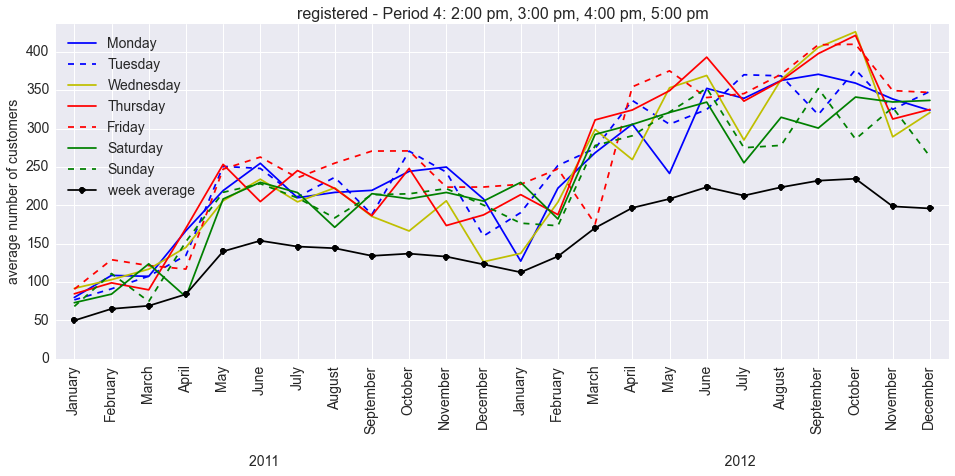

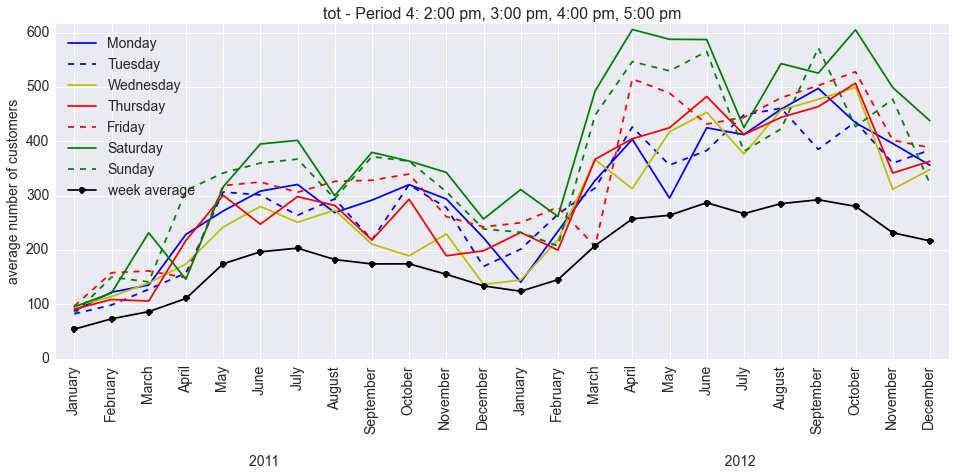

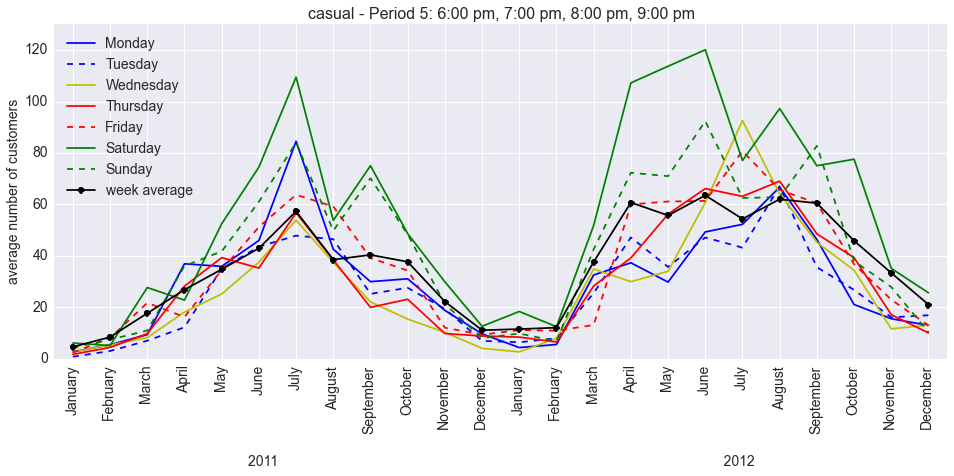

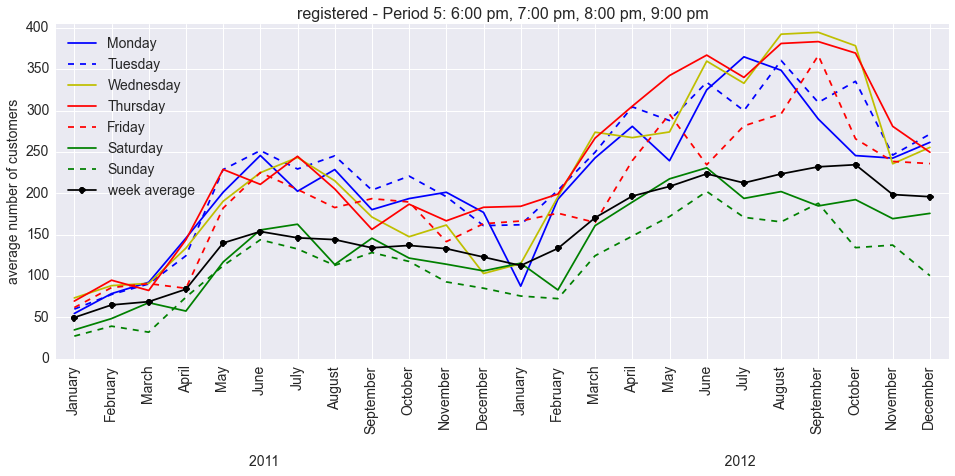

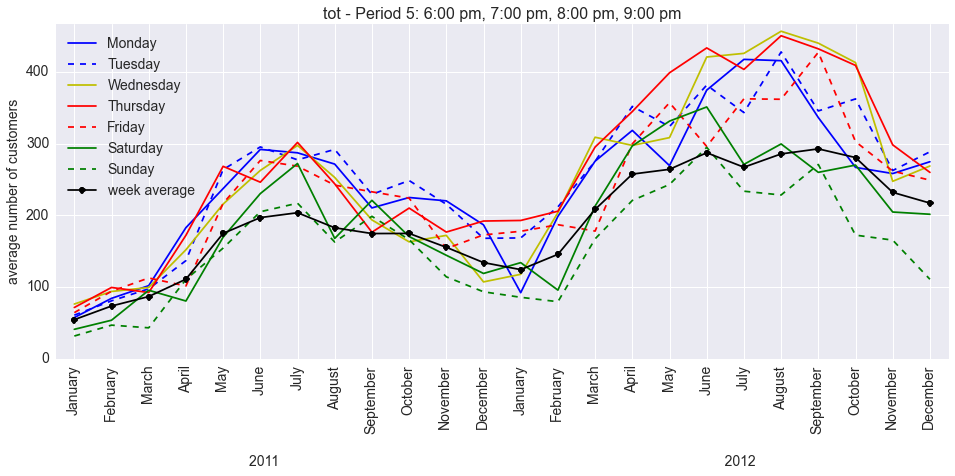

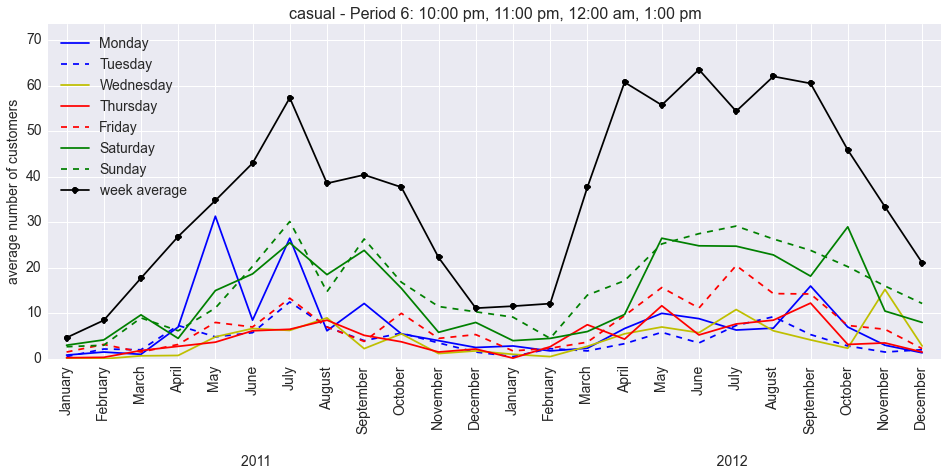

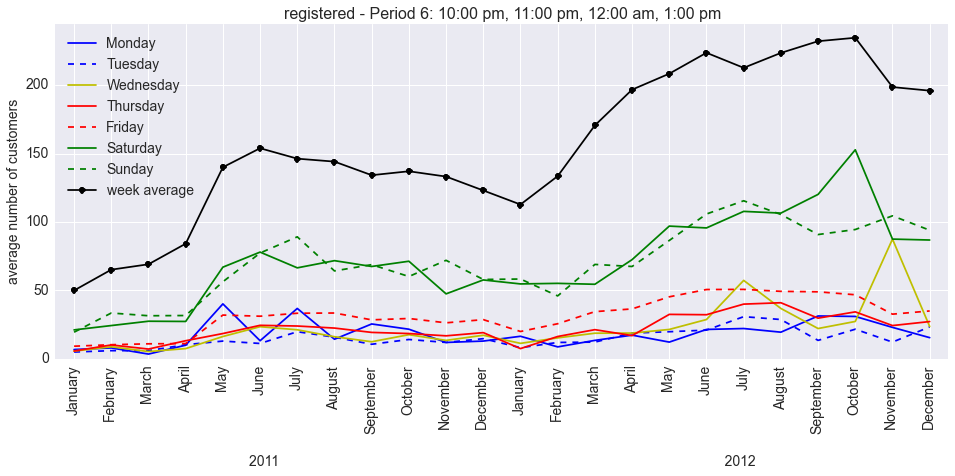

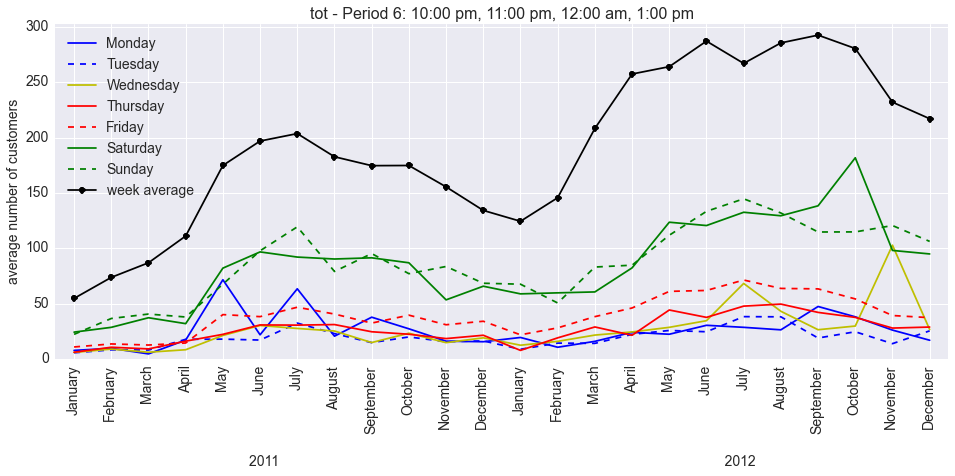

In [346]:
months = ['January','February','March','April','May','June','July',
          'August','September','October','November','December']
weekday_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

colors = ["b-","b--","y","r-","r--","g-","g--"]

periods_itr = range(1,7)

periods_title= ["2:00 am, 3:00 am, 4:00 am, 5:00 am",
                "6:00 am, 7:00 am, 8:00 am, 9:00 am",
                "10:00 am, 11:00 am, 12:00 pm, 1:00 pm",
                "2:00 pm, 3:00 pm, 4:00 pm, 5:00 pm",
                "6:00 pm, 7:00 pm, 8:00 pm, 9:00 pm",
                "10:00 pm, 11:00 pm, 12:00 am, 1:00 pm"]

max_y = 0

for itr in periods_itr:
  for target in target_var:
    max_y = 0
    plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
    
    # plotting for each weekday
    for i in range(7):
        tot_mean = groupby_year_month_weekday_periods.xs(i, level = 'weekday', axis = 0
                                                        ).xs(itr, level = 'periods', axis = 0)[target]
        plt.plot(tot_mean,colors[i])
        max_y = max(max_y,max(tot_mean.tolist()))
    
    # adding the monthly average counting all weekdays
    plt.plot(data_train.groupby(['year','month']).mean()[target],"ko-")
    
    max_y = max(max_y, max(data_train.groupby(['year','month']).mean()[target]) )
    plt.title(target + " - Period "+ str(itr) + ": " + periods_title[itr-1],fontsize=16)
    plt.legend(weekday_names + ['week average'], loc = 'upper left', fontsize = 14)    
    plt.xticks(range(24), months*2,rotation = 90, fontsize = 14)  
    plt.yticks(fontsize = 14)
    plt.xlabel("\n2011".ljust(120)+"2012", fontsize = 14)
    plt.ylabel("average number of customers", fontsize = 14)
    plt.axis((-.5,23.5,0,max_y +10))    
    plt.show()  

### Note and discussion:

Let's split the hours time into 6 chunks of 4 hours periods:
* 1: ** [2:00 am, 3:00 am, 4:00 am, 5:00 am]**  ------> both casual and registered (and therefore total) customers are highest during the weekend.
* 2: ** [6:00 am, 7:00 am, 8:00 am, 9:00 am]**  ------> Casual customers behave almost within the same range below the week average for all days. Registered customers usually use the system more during the workdays (above the the week average) and the usage during the weekends in below the week average.
* 3: ** [10:00 am, 11:00 am, 12:00 pm, 1:00 pm]**  --> both casual and registered (and therefore total) customers are highest during the weekend.
* 4: ** [2:00 pm, 3:00 pm, 4:00 pm, 5:00 pm] **  ------> All are above the week average. The casual and total is highest during the weekend. For registered, all days are of the same order. 
* 5: ** [6:00 pm, 7:00 pm, 8:00 pm, 9:00 pm] **  ------> no comment.
* 6: ** [10:00 pm, 11:00 pm, 12:00 am, 1:00 pm] ** --> All are below the week average and the average number of customers is highest during the weekend.







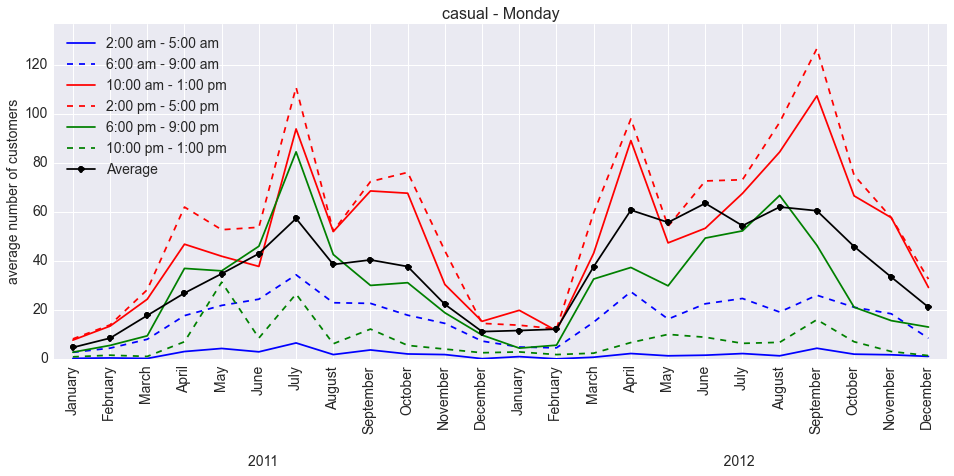

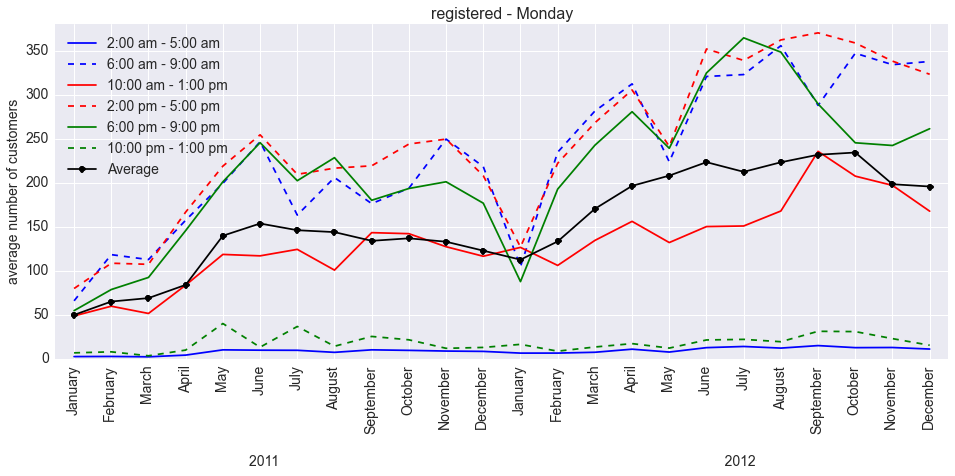

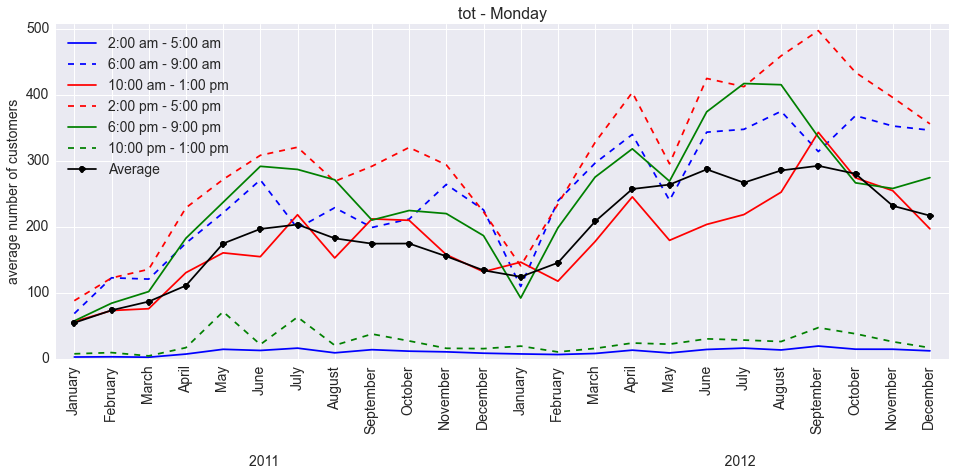

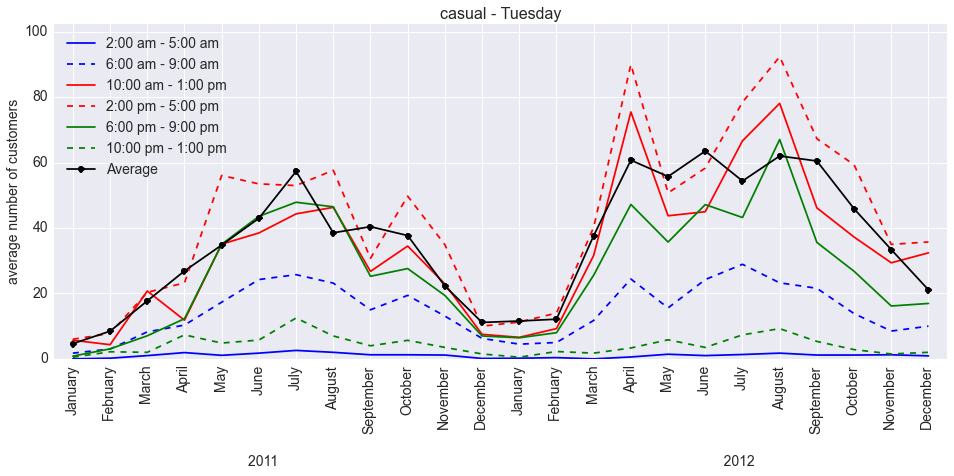

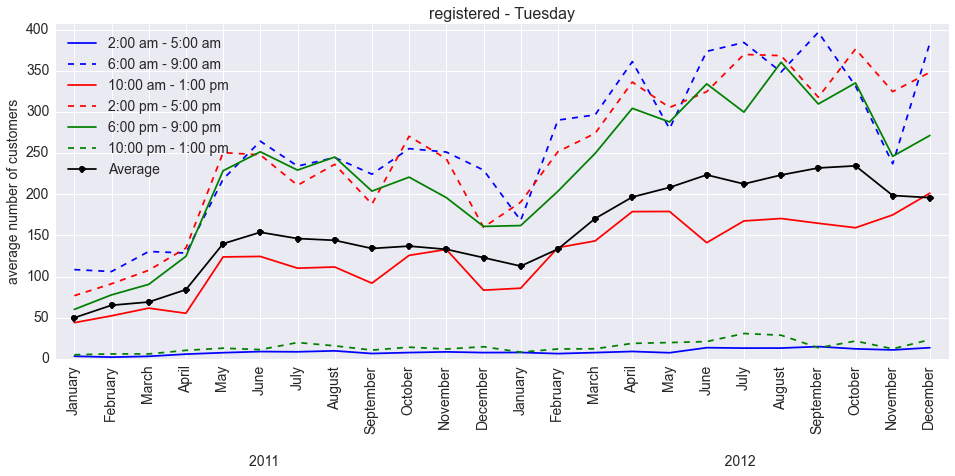

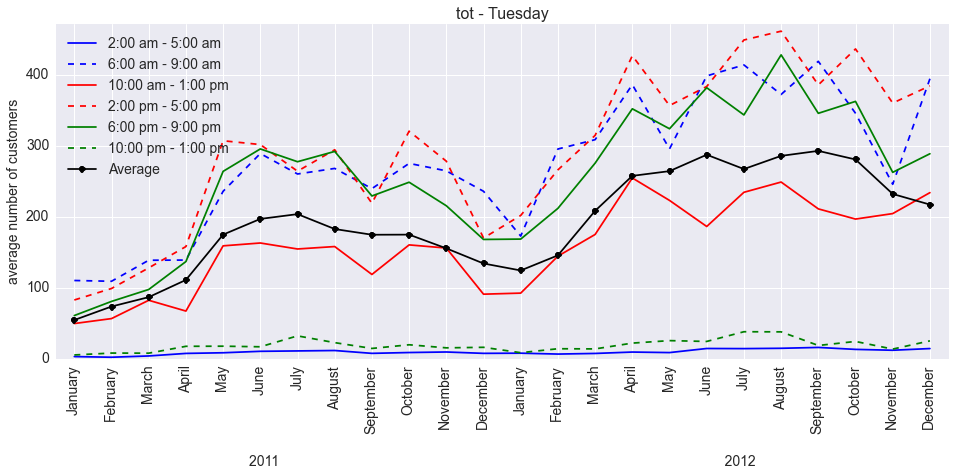

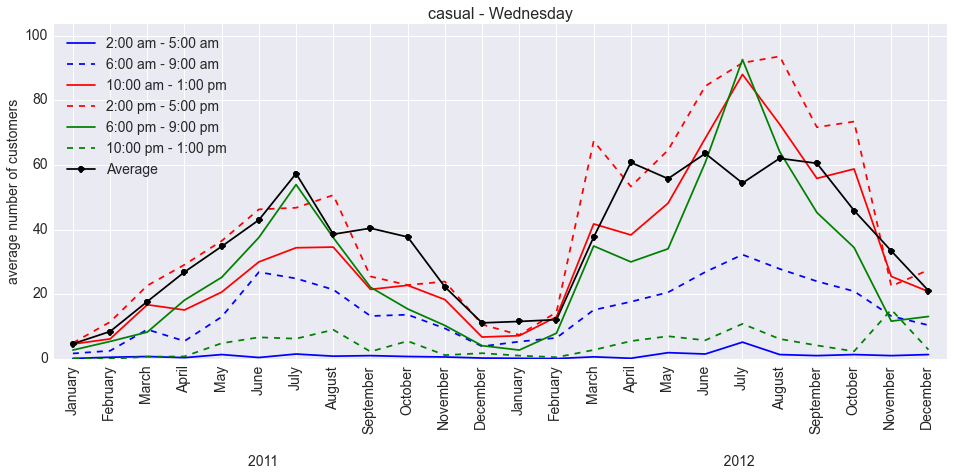

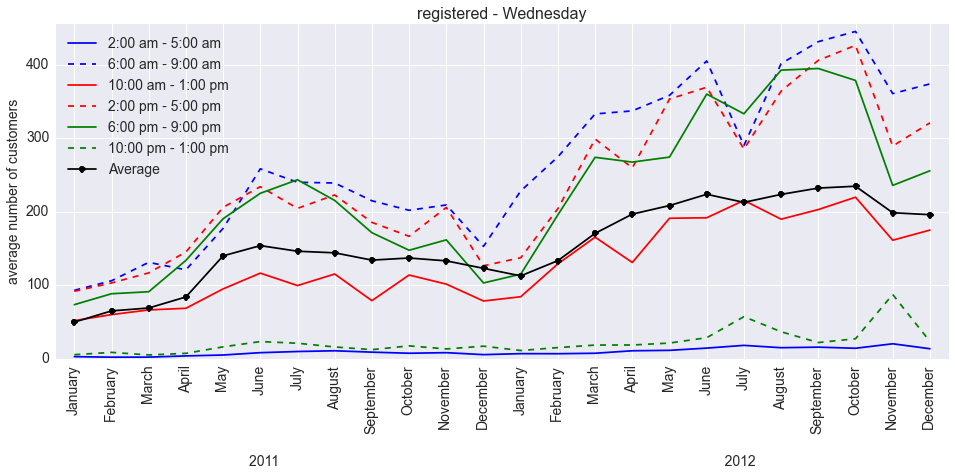

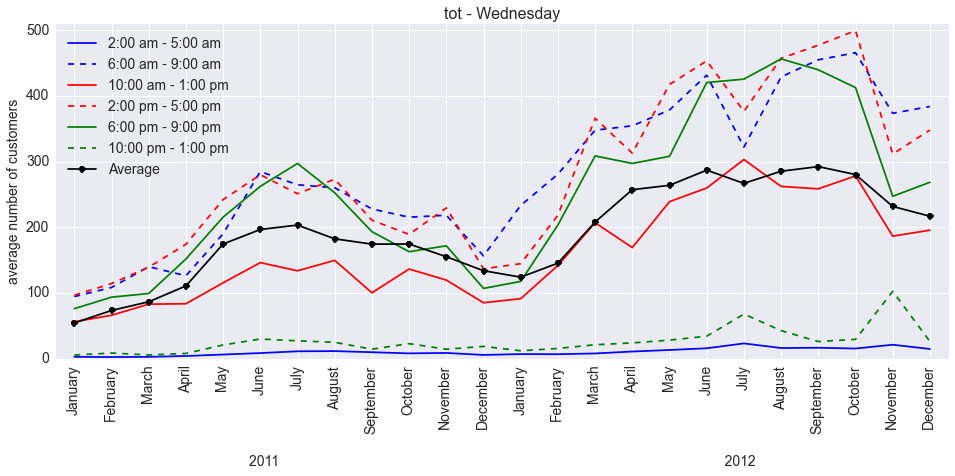

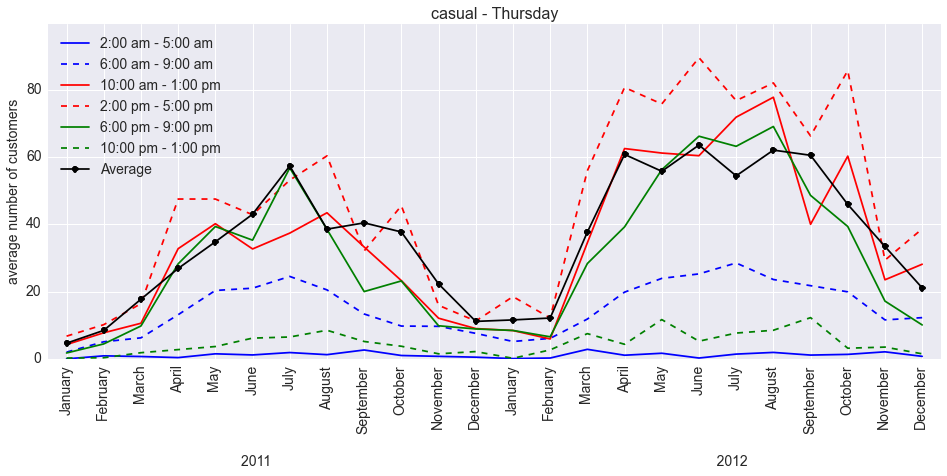

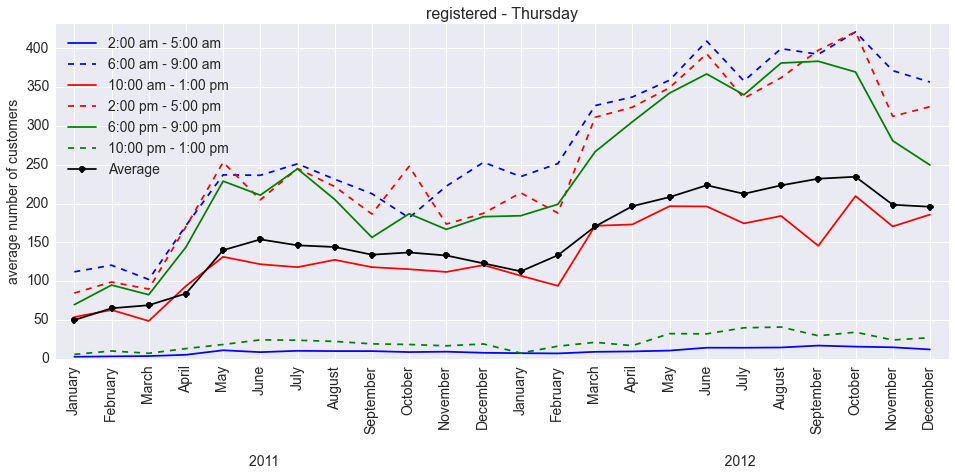

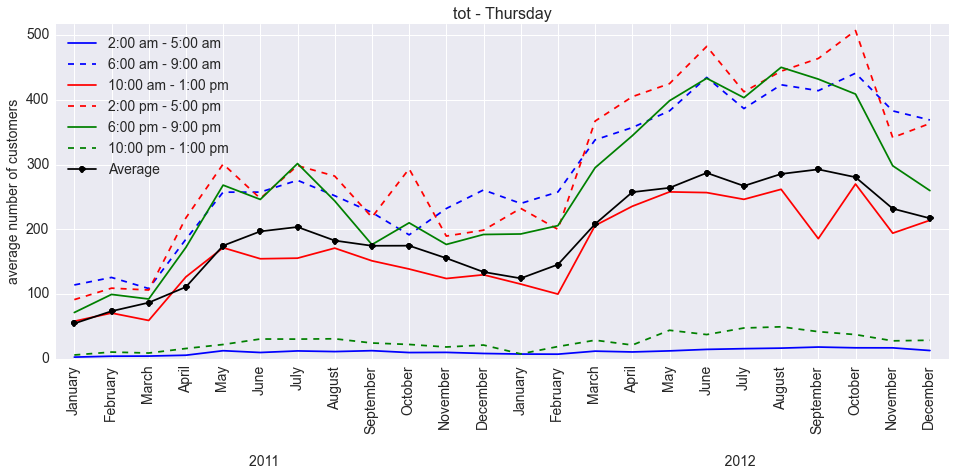

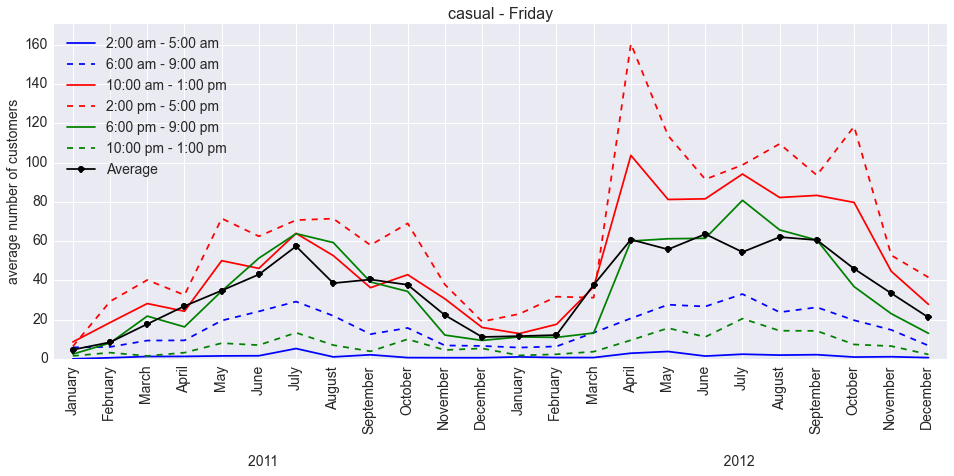

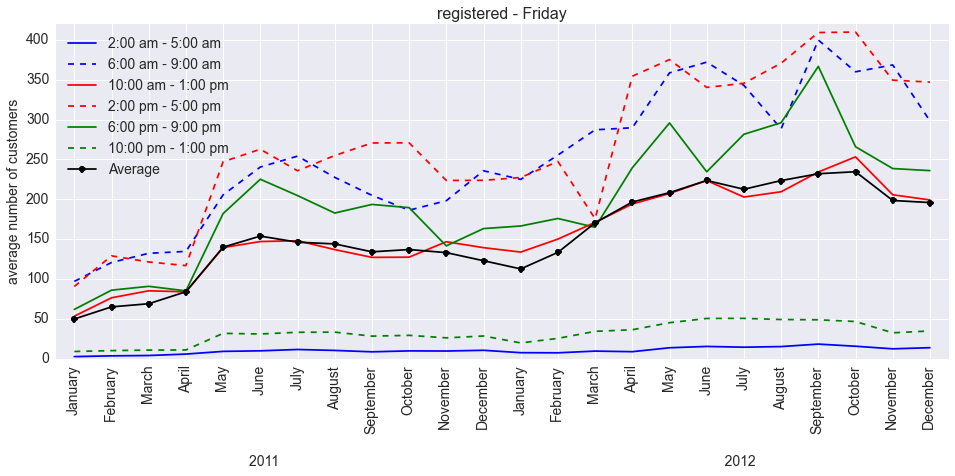

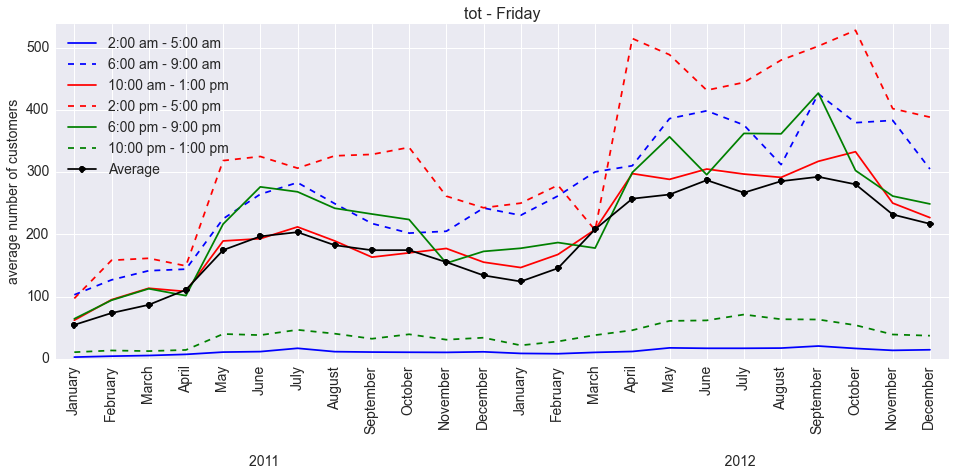

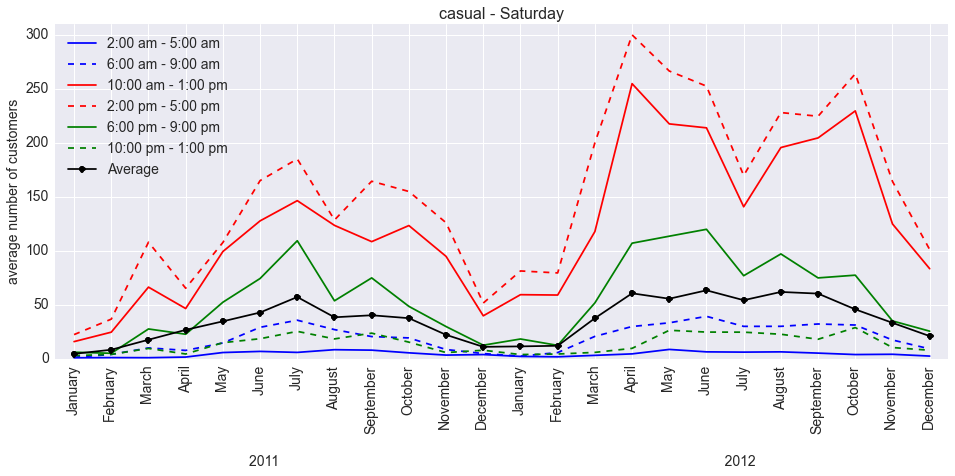

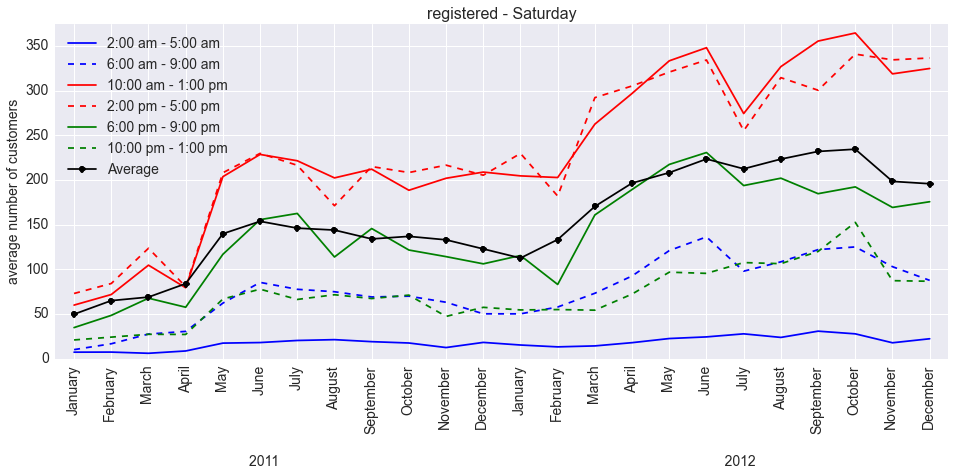

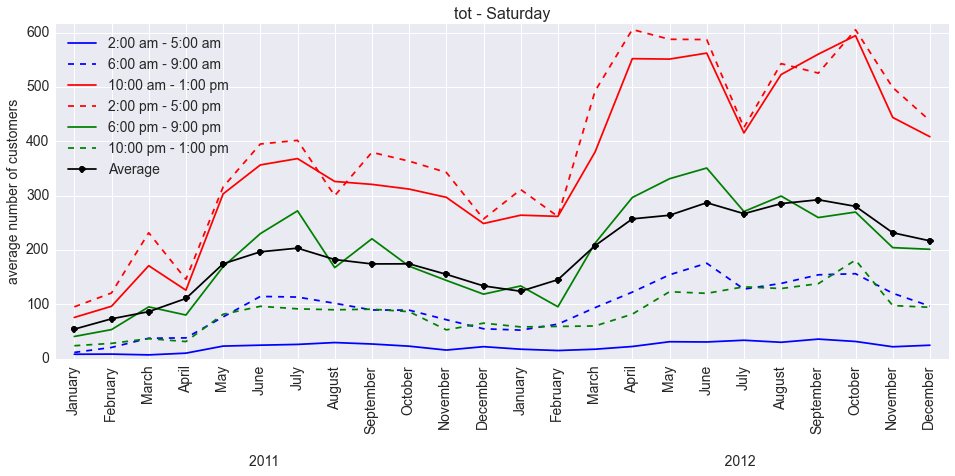

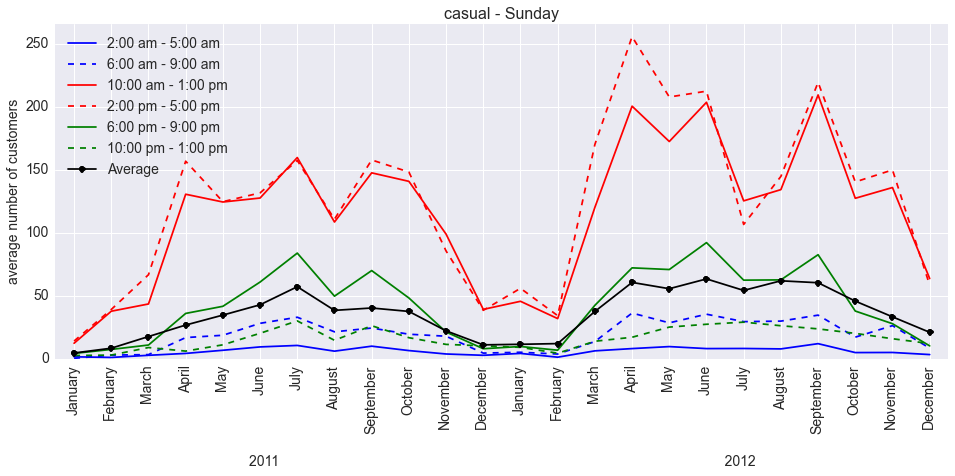

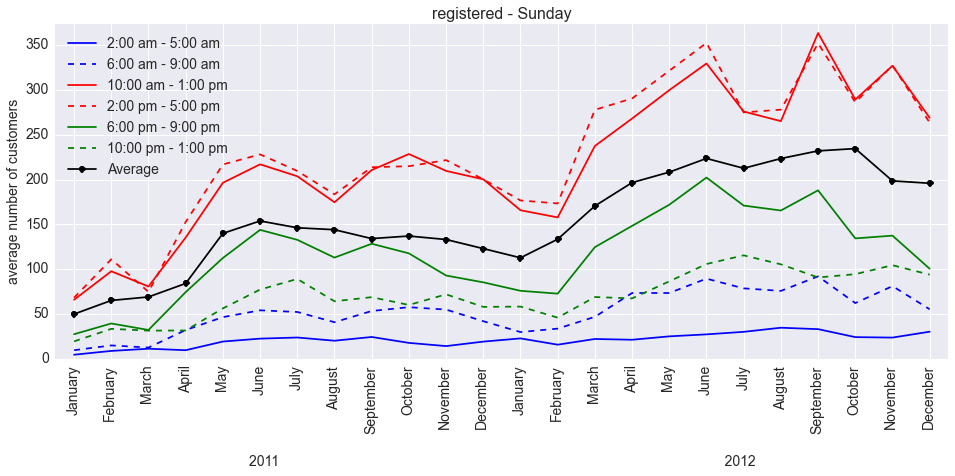

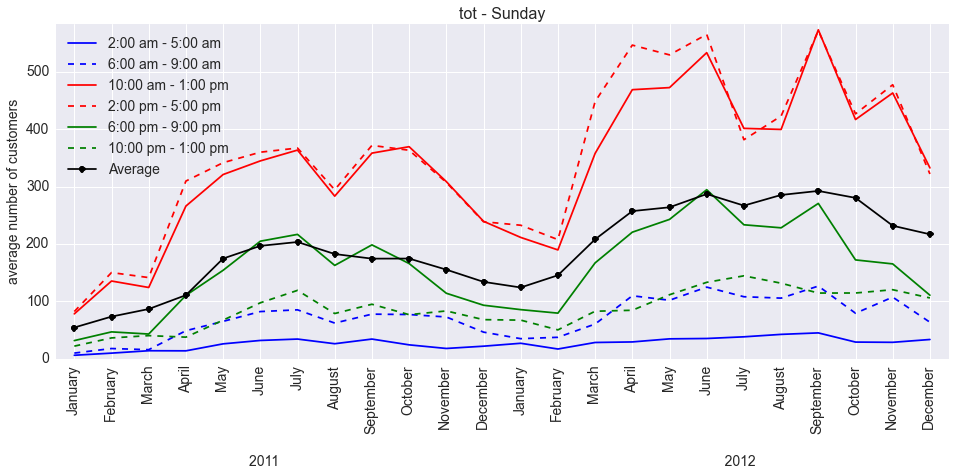

In [345]:
months = ['January','February','March','April','May','June','July',
          'August','September','October','November','December']
weekday_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

colors = ["b-","b--","r-","r--","g-","g--"]

periods_itr = range(1,7)

periods_title = ["2:00 am - 5:00 am",
                "6:00 am - 9:00 am",
                "10:00 am - 1:00 pm",
                "2:00 pm - 5:00 pm",
                "6:00 pm - 9:00 pm",
                "10:00 pm - 1:00 pm"]

max_y = 0

for i in range(7):
  for target in target_var:
    max_y = 0
    plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
    
    # plotting for each weekday
    for itr in periods_itr:
        tot_mean = groupby_year_month_weekday_periods.xs(i, level = 'weekday', axis = 0
                                                        ).xs(itr, level = 'periods', axis = 0)[target]
        plt.plot(tot_mean,colors[itr-1])
        max_y = max(max_y,max(tot_mean.tolist()))
    
    # adding the monthly average counting all weekdays
    plt.plot(data_train.groupby(['year','month']).mean()[target],"ko-")
    
    max_y = max(max_y, max(data_train.groupby(['year','month']).mean()[target]) )
    plt.title(target + " - " + weekday_names[i] ,fontsize=16)
    plt.legend(periods_title + ['Average'], loc = 'upper left', fontsize = 14)    
    plt.xticks(range(24), months*2,rotation = 90, fontsize = 14)  
    plt.yticks(fontsize = 14)
    plt.xlabel("\n2011".ljust(120)+"2012", fontsize = 14)
    plt.ylabel("average number of customers", fontsize = 14)
    plt.axis((-.5,23.5,0,max_y +10))    
    plt.show()  

The observation in the above figures are discussed before. 

### Note and conclusion:

So, the next step is to investigate what sort of information we can get from these observations. We obtained the average customers at different time frames for different weekdays, months and years. One approach is to use these data as features for training our models. This kaggle problem is an interpolation problem, therefore, it is a good idea to assume the targets to be predicted is close to the average of the known values. Then, the other fetures make a correction to the average value to predict the target more accurately. This is just a hypothesis and we will examine it.   